In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"data\movie_db.csv", lineterminator = '\n')

In [4]:
# pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


* we have dataframe consisting of 9827 rows and 9 columns
* there are no duplicate and Nan values
* coulmns like : Overview, Original_Language and Poster-Url are not usefull during analysis, so we will remove them
* Release_Date column needs to be casted into date time and to extract only the year value


##### checking  null value

In [64]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

##### Drop columns

In [6]:
df.drop(columns= ['Overview', 'Original_Language', 'Poster_Url'], inplace= True)

In [66]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

##### DateTime

In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [8]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

##### genre into category

In [9]:
df['Genre']= df['Genre'].str.split(", ")
df = df.explode('Genre').reset_index(drop=True)

##### casting col

In [10]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1), object(1)
memory usage: 932.8+ KB


##### columns increase

In [12]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average      74
Genre             19
dtype: int64

#### 1. What is the most frequent genre of movies released on Netflix ?

In [29]:
df['Genre'].value_counts().head(6)

Genre
Drama        3744
Comedy       3031
Action       2686
Thriller     2488
Adventure    1853
Romance      1476
Name: count, dtype: int64

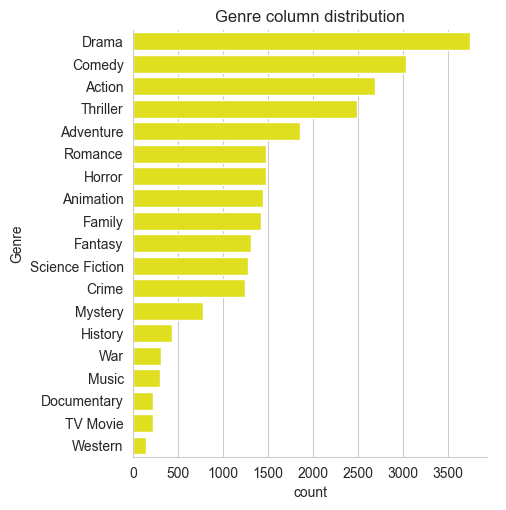

In [38]:
sns.set_style('whitegrid')
sns.catplot( y = 'Genre', data = df, kind= 'count', order = df['Genre'].value_counts().index, color ='yellow')
plt.title('Genre column distribution')
plt.show()

#### 2. What genre has the highest votes ?

In [50]:
a = df.groupby('Genre', observed= True)['Vote_Count'].sum().sort_values(ascending= False)[:5]

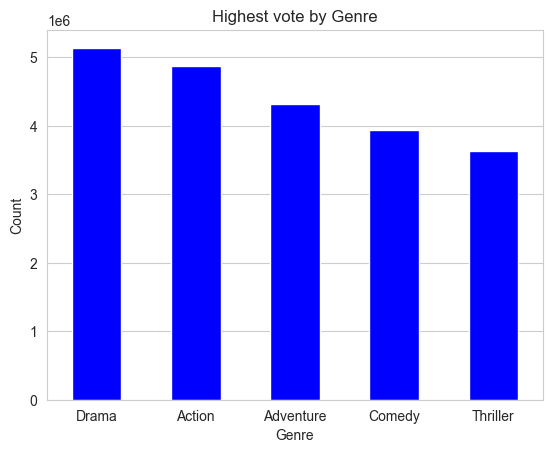

In [63]:
a.plot(kind= 'bar', color = 'blue')

plt.title('Highest vote by Genre')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.grid(axis = 'x')
plt.show()

#### 3. What movie got highest popularity ? whats its genre ?

In [67]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


#### 4. What movie got lowest polularity ? whats its genre ?

In [69]:
df.loc[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


#### 5. Which year has the most filmed movies ?

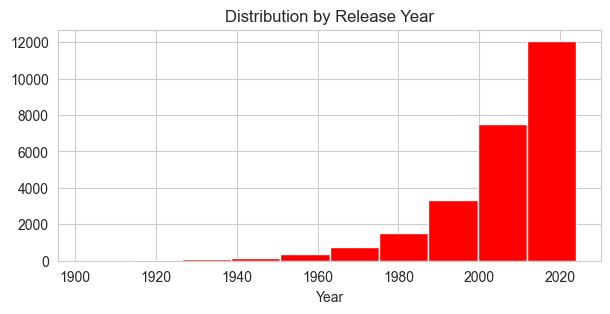

In [75]:
plt.figure(figsize= (7,3))

plt.hist(x= 'Release_Date', data = df, color= 'red')
plt.title('Distribution by Release Year')
plt.xlabel('Year')
plt.show()

In [13]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery
